<a href="https://colab.research.google.com/github/HariniRavi490/DataMining_Assignment1/blob/main/DataMiningAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train Data Preparation

In [ ]:
%autosave 120
import sqlite3 as sql
# ! wget https://github.com/HariniRavi490/DataMining_Assignment1/blob/main/Assignment2023.sqlite
con = sql.connect('/content/Assignment2023.sqlite')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from seaborn import load_dataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedKFold, KFold, ShuffleSplit
train_df = pd.read_sql_query("select * from train", con)
test_df = pd.read_sql_query("select * from test", con)


vghkcdry

In [ ]:
train_df


Att00     Att01     Att02     Att04     Att05     Att07     Att08  \
4999 -0.413317 -1.392620  2.242630  0.988862 -0.282464 -1.137982 -0.692354   
1103 -0.382380 -1.522825  0.570231 -1.011263  0.191946  0.162491  0.361403   
3288  0.178599  0.988562  0.544007  0.988862  1.082233 -0.444222  0.637713   
3289 -0.694564  1.252281  2.151041 -1.011263 -2.200750 -0.484636  0.289885   
3290 -0.694564  1.252281  2.151041 -1.011263 -2.200750 -0.484636  0.289885   
...        ...       ...       ...       ...       ...       ...       ...   
3076  1.172690 -1.269654  0.356928  0.988862 -0.568012 -0.203359  1.369352   
3077  0.401458  0.002796  0.564206  0.988862  1.239168 -0.784163 -0.491749   
3078  0.944757 -1.753220 -0.756137 -1.011263 -0.125918  0.604091 -0.230770   
3067 -0.495729  0.091989 -0.985744  0.988862  0.900004  0.219319 -1.522008   
3474  0.412466  0.749376  1.365065  0.988862 -1.447357  0.131070  0.907939   

         Att09     Att10     Att12  ...  Att16_ITRV  Att16_PWEH  Att16_QKNH  \
4999 -0.739173  0.106568 -0.480074  ...   -0.360831    1.533364   -0.046956   
1103 -0.947191  0.348462  0.324594  ...   -0.360831   -0.652161   -0.046956   
3288 -0.921488 -0.516700  0.766662  ...   -0.360831    1.533364   -0.046956   
3289 -0.856379  0.256202 -0.491819  ...   -0.360831   -0.652161   -0.046956   
3290 -0.856379  0.256202 -0.491819  ...   -0.360831   -0.652161   -0.046956   
...        ...       ...       ...  ...         ...         ...         ...   
3076 -0.073466  1.011146  1.530759  ...   -0.360831   -0.652161   -0.046956   
3077 -0.981353 -1.481887  0.859871  ...   -0.360831   -0.652161   -0.046956   
3078  1.373438 -0.025471  0.128047  ...   -0.360831   -0.652161   -0.046956   
3067  0.870947 -1.442756 -0.458953  ...   -0.360831    1.533364   -0.046956   
3474  0.554591  1.509987 -1.063895  ...   -0.360831   -0.652161   -0.046956   

      Att16_VVQP  Att16_XCYU  Att16_YCQC  Att16_YNCP  Att16_ZFBS  Att25_CDJW  \
4999   -0.288831   -0.495621   -0.095298   -0.566264   -0.210940    0.993223   
1103   -0.288831    2.017670   -0.095298   -0.566264   -0.210940    0.993223   
3288   -0.288831   -0.495621   -0.095298   -0.566264   -0.210940    0.993223   
3289   -0.288831    2.017670   -0.095298   -0.566264   -0.210940    0.993223   
3290   -0.288831    2.017670   -0.095298   -0.566264   -0.210940    0.993223   
...          ...         ...         ...         ...         ...         ...   
3076   -0.288831    2.017670   -0.095298   -0.566264   -0.210940   -1.006823   
3077   -0.288831    2.017670   -0.095298   -0.566264   -0.210940   -1.006823   
3078   -0.288831   -0.495621   -0.095298    1.765960   -0.210940   -1.006823   
3067   -0.288831   -0.495621   -0.095298   -0.566264   -0.210940   -1.006823   
3474   -0.288831   -0.495621   -0.095298   -0.566264    4.740694    0.993223   

      Att25_VVFP  
4999   -0.014144  
1103   -0.014144  
3288   -0.014144  
3289   -0.014144  
3290   -0.014144  
...          ...  
3076   -0.014144  
3077   -0.014144  
3078   -0.014144  
3067   -0.014144  
3474   -0.014144  

[5000 rows x 38 columns]

In [ ]:
test_df

Att00     Att01     Att02     Att03     Att04     Att05     Att06  \
0   -1.136854  0.496242 -0.799324  1.338277  0.984126  0.591703  0.710615   
1   -0.534361  0.228178 -0.665512 -0.705458  0.984126  0.205212 -1.034700   
2    0.177833  0.218296  1.951999  1.032535 -1.016130 -1.228699 -2.547299   
3    0.913932 -0.564323  0.081419  0.006796 -1.016130 -1.233821 -0.653642   
4   -0.198658  2.006523 -0.091874  0.246501 -1.016130  0.807040 -1.479065   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.680759 -0.794411 -2.195106 -2.197007  0.984126 -1.373878 -0.527877   
496  0.736005 -0.173169  1.118980  0.405939 -1.016130  1.050645  1.667803   
497  0.792503 -1.010992 -0.580661  0.985416  0.984126  1.584502 -1.474192   
498 -2.957578 -1.186158  0.821046  0.127794 -1.016130  1.238555  0.637973   
499 -2.209986 -0.666139  2.174538 -0.433451  0.984126 -0.468993  0.946785   

        Att07     Att08     Att09  ...  Att16_ITRV  Att16_MFLQ  Att16_PWEH  \
0   -0.064401 -0.856077  0.654845  ...   -0.362245   -0.044766   -0.639101   
1    0.084406  0.465968  0.961055  ...   -0.362245   -0.044766    1.564697   
2    1.164945  0.817244 -0.217117  ...   -0.362245   -0.044766    1.564697   
3   -0.815034  0.017002  1.487327  ...   -0.362245   -0.044766    1.564697   
4   -0.128387  0.509898 -0.569066  ...   -0.362245   -0.044766    1.564697   
..        ...       ...       ...  ...         ...         ...         ...   
495  0.358452 -0.214069 -1.510327  ...   -0.362245   -0.044766    1.564697   
496  0.059165  0.276906 -0.304784  ...   -0.362245   -0.044766   -0.639101   
497 -0.521246  0.403911 -1.674648  ...   -0.362245   -0.044766    1.564697   
498 -0.487538  0.828856  1.228633  ...   -0.362245   -0.044766   -0.639101   
499 -1.940582 -1.633389  0.892026  ...   -0.362245   -0.044766   -0.639101   

     Att16_QKNH  Att16_VVQP  Att16_XCYU  Att16_YCQC  Att16_YNCP  Att16_ZFBS  \
0     -0.077693   -0.302825         2.0   -0.100504   -0.565032   -0.198749   
1     -0.077693   -0.302825        -0.5   -0.100504   -0.565032   -0.198749   
2     -0.077693   -0.302825        -0.5   -0.100504   -0.565032   -0.198749   
3     -0.077693   -0.302825        -0.5   -0.100504   -0.565032   -0.198749   
4     -0.077693   -0.302825        -0.5   -0.100504   -0.565032   -0.198749   
..          ...         ...         ...         ...         ...         ...   
495   -0.077693   -0.302825        -0.5   -0.100504   -0.565032   -0.198749   
496   -0.077693   -0.302825        -0.5   -0.100504    1.769811   -0.198749   
497   -0.077693   -0.302825        -0.5   -0.100504   -0.565032   -0.198749   
498   -0.077693   -0.302825         2.0   -0.100504   -0.565032   -0.198749   
499   -0.077693    3.302236        -0.5   -0.100504   -0.565032   -0.198749   

     Att25_CDJW  
0      1.070478  
1      1.070478  
2      1.070478  
3     -0.934162  
4      1.070478  
..          ...  
495   -0.934162  
496   -0.934162  
497    1.070478  
498    1.070478  
499    1.070478  

[500 rows x 43 columns]

In [ ]:
train_df.head(20)
train_df.tail(20)

train_df.drop(columns='index', inplace =True)

In [ ]:
def missing(train_df):
  """
  For each attribute/column in the dataframe `df`, count the number of missing entries.
  Return a list of all the coulmns with more than 80% missing entries.
  """
  missing_dict = dict()
  total = train_df.shape[0] # shape[0] is the number of rows
  for attribute in train_df.columns:
    missing = train_df[attribute].isna().sum() # count the number of Null/nan/na values
    frac = missing/total * 100 # as a percentage
    missing_dict[attribute] = frac
  return missing_dict

In [ ]:
m_values =missing(train_df)
m_values

{'Att00': 0.0,
 'Att01': 0.0,
 'Att02': 0.0,
 'Att03': 0.0,
 'Att04': 0.0,
 'Att05': 0.0,
 'Att06': 0.0,
 'Att07': 1.0,
 'Att08': 0.0,
 'Att09': 0.0,
 'Att10': 0.0,
 'Att11': 0.0,
 'Att12': 0.0,
 'Att13': 0.0,
 'Att14': 0.0,
 'Att15': 19.84,
 'Att16': 0.0,
 'Att17': 0.0,
 'Att18': 0.0,
 'Att19': 0.0,
 'Att20': 0.0,
 'Att21': 0.0,
 'Att22': 0.0,
 'Att23': 0.0,
 'Att24': 59.199999999999996,
 'Att25': 0.0,
 'Att26': 0.0,
 'Att27': 0.0,
 'Att28': 0.0,
 'Att29': 0.0,
 'class': 0.0}

In [ ]:
train_df.describe()

Att00        Att01        Att02        Att03        Att04  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      1.235707     8.894726   -15.120745    -8.246908     0.505600   
std     137.167515    70.651048    59.209741    37.440821     0.500019   
min    -470.526318  -257.967406  -275.031614  -190.014095     0.000000   
25%     -90.378394   -40.336981   -54.723641   -34.021796     0.000000   
50%       2.236462     2.757052   -17.881205    -8.500022     1.000000   
75%      91.514748    53.670091    20.885770    16.492377     1.000000   
max     503.560365   260.392649   257.135693   157.279678     1.000000   

             Att05        Att06        Att07        Att08        Att09  ...  \
count  5000.000000  5000.000000  4950.000000  5000.000000  5000.000000  ...   
mean      2.252957    -0.663542     1.779249    -2.266749    -1.701296  ...   
std     179.362017     4.118534     4.465177    10.886531     7.284960  ...   
min    -534.787654   -15.245941   -14.073070   -47.086247   -28.271703  ...   
25%    -115.599660    -3.360314    -1.199978    -9.636373    -6.537468  ...   
50%       0.611999    -0.789914     1.778584    -2.372559    -1.841460  ...   
75%     118.558531     2.041445     4.836956     5.056336     3.091255  ...   
max     820.213797    13.891561    19.618439    40.118717    27.301723  ...   

             Att20        Att21        Att22        Att23        Att24  \
count  5000.000000  5000.000000  5000.000000  5000.000000  2040.000000   
mean      0.295955   -13.216400     0.241637    -1.068477    -0.036487   
std      32.851985   787.810078    24.226580     6.631919     1.648608   
min    -112.692306 -3036.000000   -87.545775   -24.549960    -6.305578   
25%     -21.645866  -548.000000   -16.305303    -5.410987    -1.140865   
50%       0.535639    -8.000000     0.232412    -1.271968    -0.050754   
75%      21.918026   503.000000    16.606121     3.287262     1.076223   
max     120.604048  2917.000000   102.917264    22.369053     5.358609   

             Att26        Att27        Att28        Att29        class  
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000  
mean      0.393400     0.494261    -0.849305    28.115560     1.298000  
std       0.488553    26.833732    98.559999    82.171724     0.782124  
min       0.000000   -93.765441  -361.591269  -277.248948     0.000000  
25%       0.000000   -17.088530   -65.804274   -28.019755     1.000000  
50%       0.000000     1.436536    -0.051444    28.479189     1.000000  
75%       1.000000    19.148454    65.390091    84.163234     2.000000  
max       1.000000   102.820437   320.785313   350.343960     2.000000  

[8 rows x 28 columns]

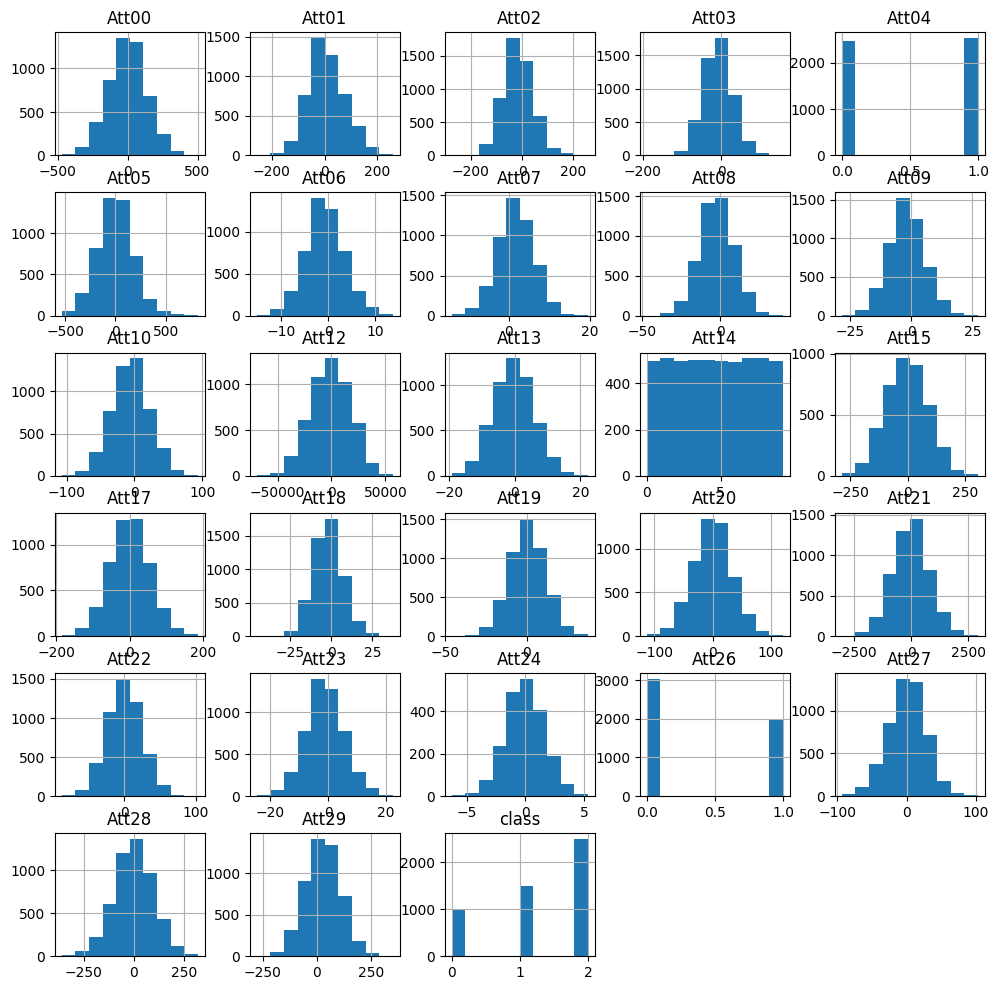

In [ ]:
train_df.hist(figsize=(12,12))
plt.show()

In [ ]:
cols_to_drop = ['Att24','Att15'] # Fill this in
train_df.drop(columns=cols_to_drop,
           inplace=True)

In [ ]:
train_df.columns

Index(['Att00', 'Att01', 'Att02', 'Att03', 'Att04', 'Att05', 'Att06', 'Att07',
       'Att08', 'Att09', 'Att10', 'Att11', 'Att12', 'Att13', 'Att14', 'Att16',
       'Att17', 'Att18', 'Att19', 'Att20', 'Att21', 'Att22', 'Att23', 'Att25',
       'Att26', 'Att27', 'Att28', 'Att29', 'class'],
      dtype='object')

In [ ]:
cols_to_impute = [ att for att,frac in m_values.items() if 0< frac <5]
cols_to_impute

['Att07']

In [ ]:
for col in cols_to_impute:
  # compute the mean
  mean = train_df[col].mean()
  # now use the fillna function to replace the NaN avalues with the mean value
  train_df[col].fillna(mean, inplace=True)

In [ ]:
m_dict = missing(train_df)
for col in cols_to_impute:
  print(col, "missing data", m_dict[col])

Att07 missing data 0.0


# Handling Duplicates

In [ ]:
train_df=train_df.round(2)
dups = train_df.duplicated()
dups.sum()

43

In [ ]:
train_df.drop_duplicates()

Att00  Att01   Att02  Att03  Att04   Att05  Att06  Att07  Att08  Att09  \
0     -31.58  -9.70  -24.91   9.08      0  208.27  -2.00   1.45 -26.60  -1.47   
1    -304.66  46.61   42.60 -56.80      1 -150.59   3.87  -2.49  11.17   5.99   
2     -32.94 -13.11  -60.39 -39.58      1 -154.42  -3.76  -0.98  -6.62  -6.89   
3     -78.47  12.42  -76.96 -17.18      0  222.14   3.87   7.11  -8.97   1.31   
4    -141.40  29.66  -64.73  -3.19      1  116.40  -4.44   4.24   6.79  -5.89   
...      ...    ...     ...    ...    ...     ...    ...    ...    ...    ...   
4995  -23.78 -19.99 -111.77  -5.23      0  -10.18   5.85   6.90   2.76  -4.02   
4996  -72.91 -71.57   57.45 -43.07      0  284.97  -0.42  -3.48 -14.93  -3.90   
4997 -120.21  47.57   -3.38  -7.43      0  -52.59  -0.91   2.18  14.64  -7.66   
4998 -150.87 -43.83   42.47 -12.97      0 -126.07  -3.92  -2.43 -12.62   0.18   
4999  -55.45 -89.49  117.65 -17.76      1  -48.41  -7.17  -3.28  -9.80  -7.09   

      ...  Att20 Att21  Att22  Att23  Att25 Att26  Att27   Att28  Att29  class  
0     ...  -7.56   952  11.27  -3.22   CDJW     0 -33.26  -30.19  -2.03    1.0  
1     ... -72.97   101   8.09   6.23   CDJW     1 -49.20   72.87  -7.41    0.0  
2     ...  -7.89  -304  -8.36  -6.06   ASCZ     0  14.26   69.97 -32.16    2.0  
3     ... -18.79  -352  -4.05   6.23   ASCZ     0   0.48  -43.88  -6.77    2.0  
4     ... -33.87   923  20.88  -7.15   CDJW     0 -38.95   65.24  90.46    1.0  
...   ...    ...   ...    ...    ...    ...   ...    ...     ...    ...    ...  
4995  ...  -5.69   418  26.77   9.42   ASCZ     0  22.72   26.55  19.25    2.0  
4996  ... -17.46  -535  23.78  -0.67   CDJW     1 -44.16   44.60  76.35    0.0  
4997  ... -28.79   295 -30.46  -1.46   CDJW     1 -47.92  -87.62   7.01    1.0  
4998  ... -36.13   753  21.56  -6.32   CDJW     1  -8.39  137.16 -41.01    0.0  
4999  ... -13.28  -372  -3.84 -11.55   CDJW     1 -56.34   99.25  84.48    0.0  

[4957 rows x 29 columns]

In [ ]:
# choose all the numeric type attributes (all of them)
numeric_attributes = train_df.select_dtypes(include='number').columns
numeric_attributes

Index(['Att00', 'Att01', 'Att02', 'Att03', 'Att04', 'Att05', 'Att06', 'Att07',
       'Att08', 'Att09', 'Att10', 'Att12', 'Att13', 'Att14', 'Att17', 'Att18',
       'Att19', 'Att20', 'Att21', 'Att22', 'Att23', 'Att26', 'Att27', 'Att28',
       'Att29', 'class'],
      dtype='object')

<ipython-input-114-4e05a6664229>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=train_df.corr()
<ipython-input-114-4e05a6664229>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(train_df.corr(),cmap="YlOrRd", annot_kws={"size": 8},linewidth=0.5)


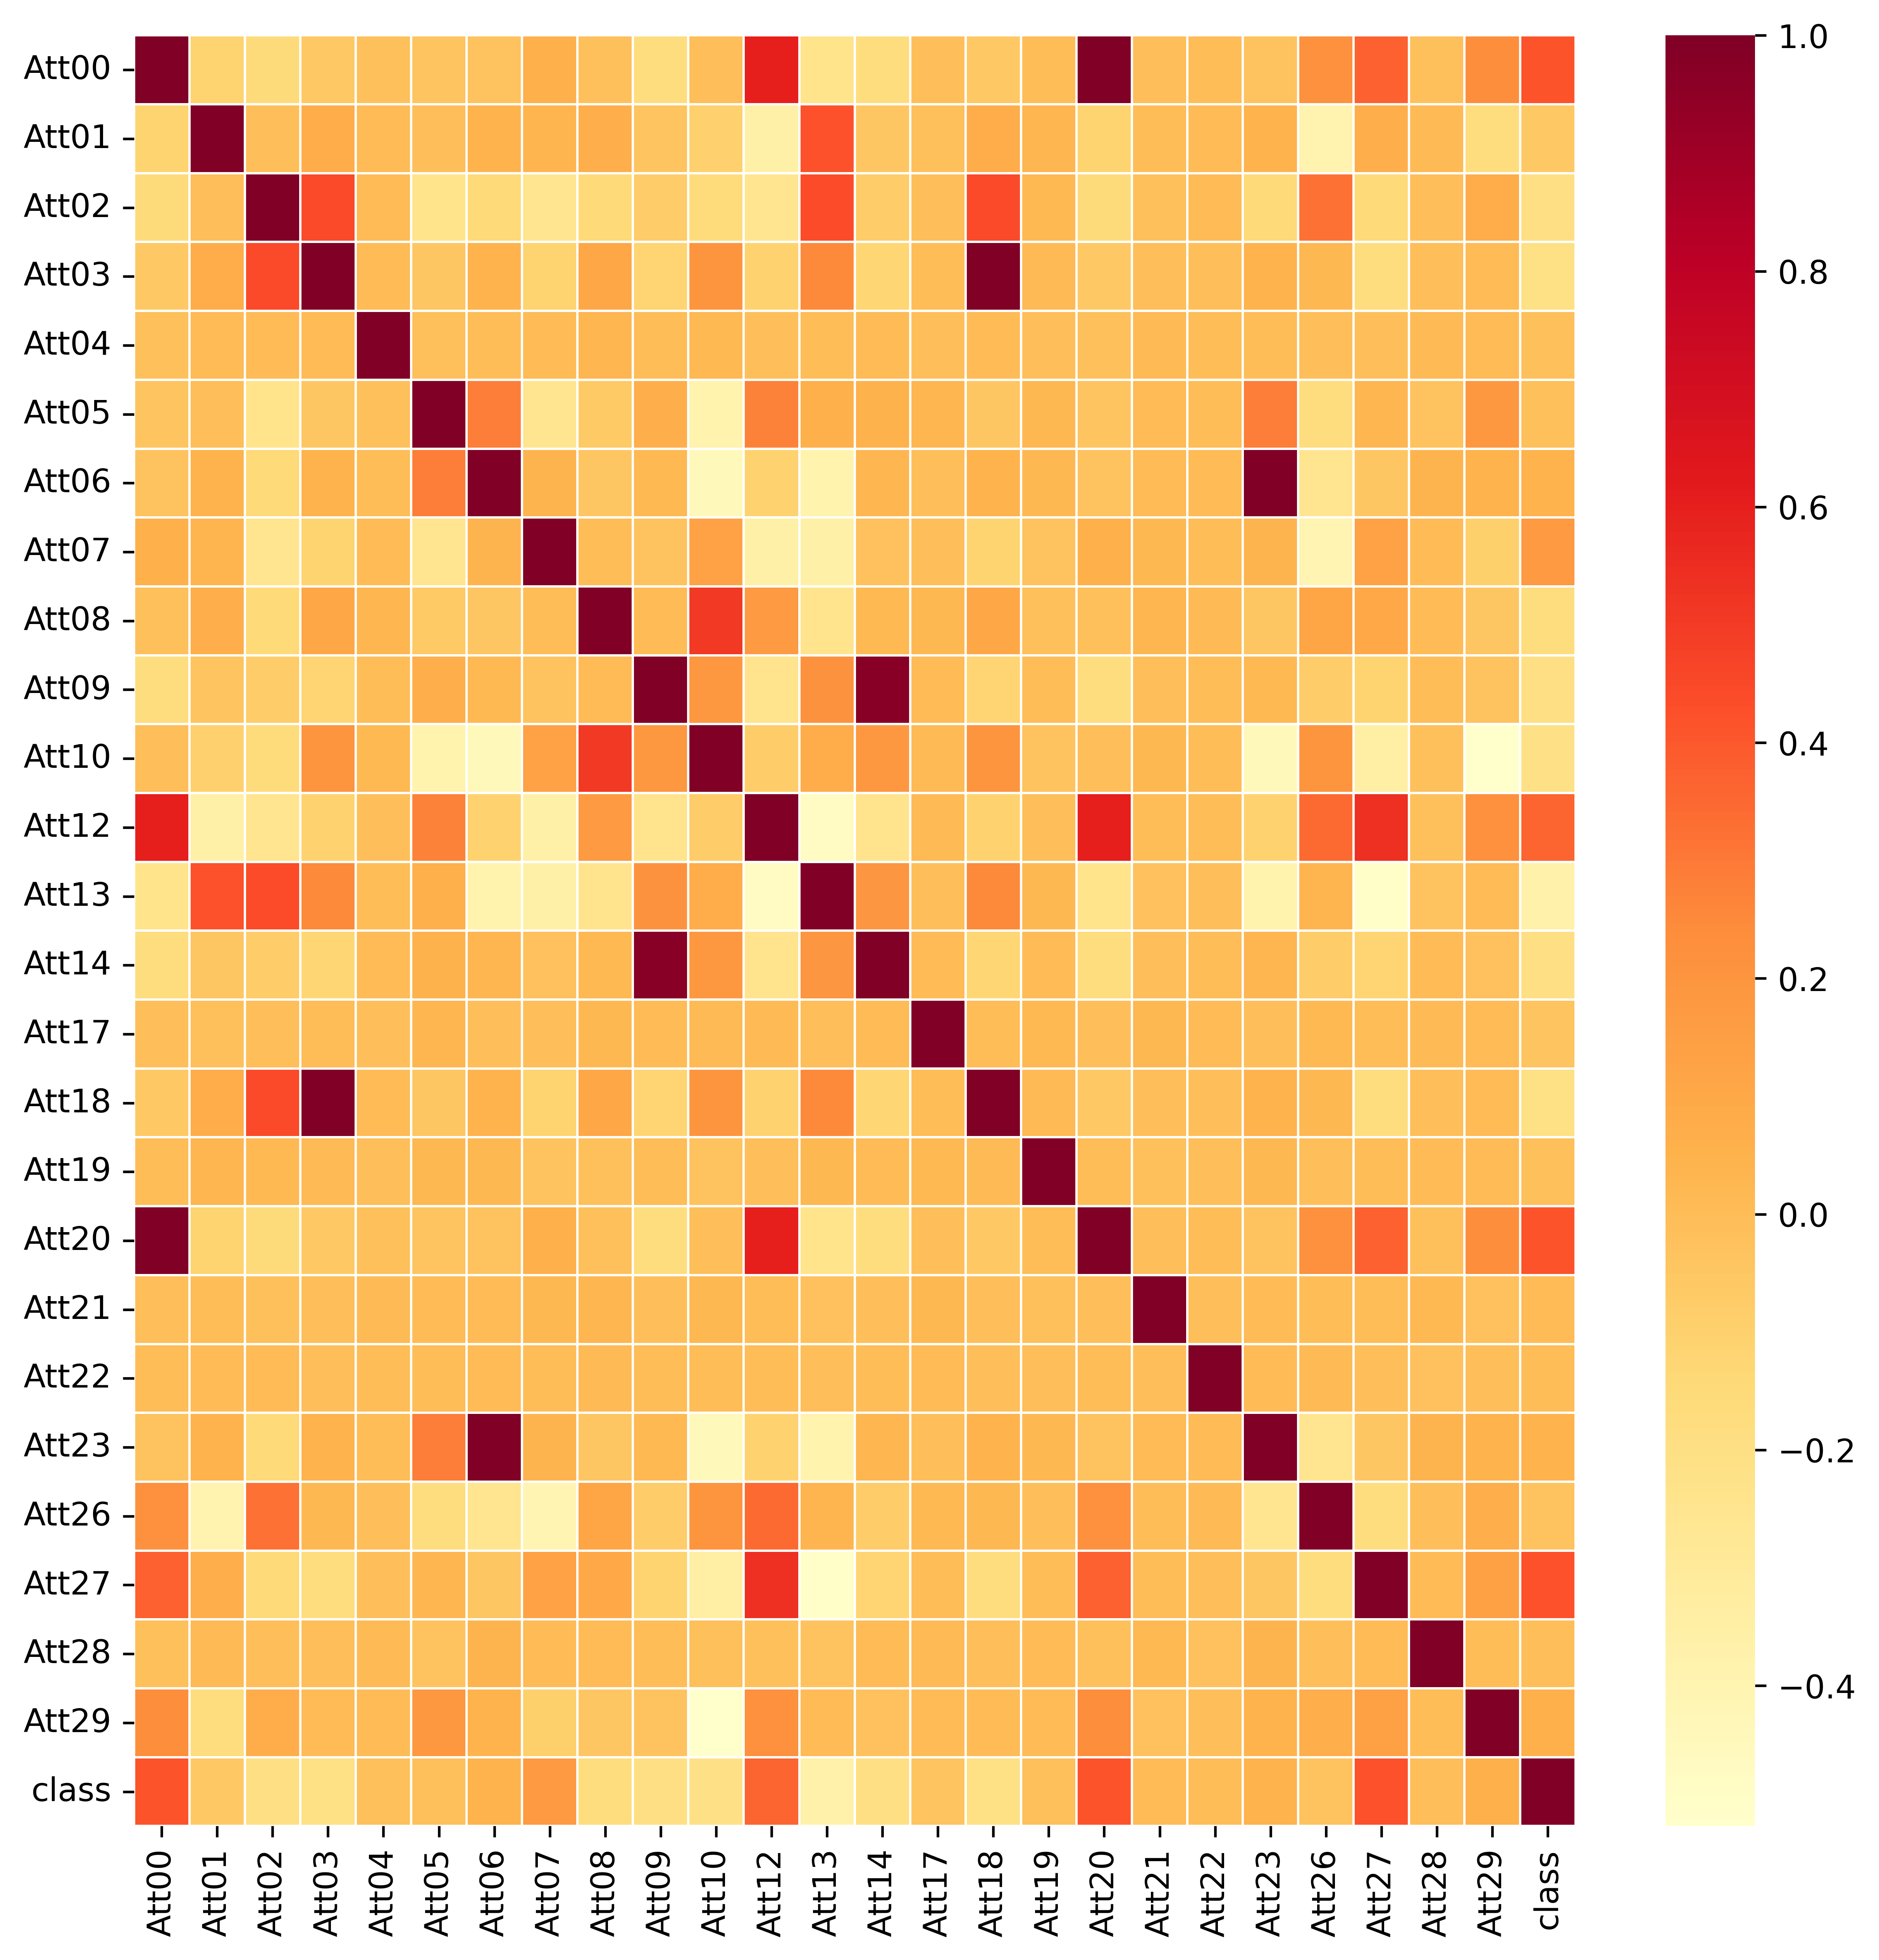

In [ ]:
correlation_matrix=train_df.corr()
# plotting correlation heatmap

plt.figure(figsize=(10, 10),
           dpi = 600)

dataplot = sns.heatmap(train_df.corr(),cmap="YlOrRd", annot_kws={"size": 8},linewidth=0.5)

# displaying heatmap
plt.show()

In [ ]:
threshold = 0.7  # Adjust this threshold as per your requirement
high_correlation_pairs = []

# Loop through the correlation matrix to identify high correlations
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
            high_correlation_pairs.append(pair)

# Print the high correlation pairs
for pair in high_correlation_pairs:
    print(f"High correlation: {pair[0]} - {pair[1]} ({pair[2]})")

High correlation: Att14 - Att09 (0.9735952640155044)
High correlation: Att18 - Att03 (1.0)
High correlation: Att20 - Att00 (0.9999999999999947)
High correlation: Att23 - Att06 (1.0000000000000013)


In [ ]:
train_df.drop(columns=['Att20','Att03','Att06','Att14'],inplace=True)

Columns to drop because of high correlation. train_df.drop(columns=['Att15','Att20','Att03','Att06','Att14','Att23'],inplace=True)

In [ ]:
ohe = OneHotEncoder()

ct = ColumnTransformer([('one-hot-encoder', OneHotEncoder(drop='first'),['Att11','Att16','Att25'])], remainder='passthrough')

ct.fit_transform(train_df)

array([[  0.        ,   1.        ,   0.        , ...,  99.24833063,
         84.47565404,   0.        ],
       [  0.        ,   1.        ,   0.        , ..., 109.45862507,
        143.64250712,   0.        ],
       [  0.        ,   0.        ,   0.        , ..., -90.53477281,
         90.68524654,   0.        ],
       ...,
       [  0.        ,   0.        ,   1.        , ...,  29.58071131,
        108.89073794,   2.        ],
       [  0.        ,   1.        ,   0.        , ..., -32.24537037,
         54.82176595,   2.        ],
       [  0.        ,   0.        ,   0.        , ..., -45.95631789,
         37.40447528,   2.        ]])

In [ ]:
train_df = pd.get_dummies(train_df, columns=['Att11','Att16','Att25'], drop_first=True)
print(train_df)

           Att00       Att01       Att02      Att03  Att04       Att05  \
4999  -55.452318  -89.485509  117.651530 -17.761150      1  -48.405311   
1103  -51.209119  -98.683684   18.639115  10.708726      0   36.677284   
3288   25.731258   78.730655   17.086547  57.640371      1  196.344992   
3289  -94.026403   97.360874  112.229088  20.433830      0 -392.438441   
3290  -94.026403   97.360874  112.229088  20.433830      0 -392.438441   
...          ...         ...         ...        ...    ...         ...   
3076  162.074590  -80.798662    6.010771   5.490352      1  -99.616670   
3077   56.297173    9.092241   18.282395 -13.655671      1  224.490370   
3078  130.812766 -114.959708  -59.886958  -7.054436      0  -20.329646   
3067  -66.755395   15.393211  -73.480565 -35.211219      1  163.663295   
3474   57.807044   61.833659   65.696297  60.283119      1 -257.321992   

         Att06     Att07      Att08     Att09  ...  Att16_ITRV  Att16_PWEH  \
4999 -7.173086 -3.276062  -9.8033

In [ ]:
train_df.corr()
# plotting correlation heatmap

plt.figure(figsize=(20, 20),
           dpi = 600)

dataplot = sns.heatmap(train_df.corr(),cmap="YlOrRd",annot =True, annot_kws={"size": 8},linewidth=0.5)

# displaying heatmap
plt.show()

In [ ]:
# choose all the numeric type attributes (all of them)
numeric_attribute = train_df.select_dtypes(include='number').columns
numeric_attribute

Index(['Att00', 'Att01', 'Att02', 'Att04', 'Att05', 'Att07', 'Att08', 'Att09',
       'Att10', 'Att12', 'Att13', 'Att17', 'Att18', 'Att19', 'Att21', 'Att22',
       'Att23', 'Att26', 'Att27', 'Att28', 'Att29', 'class', 'Att11_KRNB',
       'Att11_LCAS', 'Att11_NAAU', 'Att11_NBAE', 'Att11_QQNT', 'Att11_USGL',
       'Att16_ITRV', 'Att16_PWEH', 'Att16_QKNH', 'Att16_VVQP', 'Att16_XCYU',
       'Att16_YCQC', 'Att16_YNCP', 'Att16_ZFBS', 'Att25_CDJW', 'Att25_VVFP'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a standard scaler
columns_to_leave = [col for col in train_df.columns if col != 'class']
s = StandardScaler()

# Fit and transform the training data to scale it
train_df[columns_to_leave] = s.fit_transform(train_df[columns_to_leave])

# Now, the training data in train_df is scaled


In [ ]:
train_df.columns

Index(['Att00', 'Att01', 'Att02', 'Att03', 'Att04', 'Att05', 'Att06', 'Att07',
       'Att08', 'Att09', 'Att10', 'Att12', 'Att13', 'Att14', 'Att17', 'Att18',
       'Att19', 'Att20', 'Att21', 'Att22', 'Att23', 'Att26', 'Att27', 'Att28',
       'Att29', 'class', 'Att11_KRNB', 'Att11_LCAS', 'Att11_NAAU',
       'Att11_NBAE', 'Att11_QQNT', 'Att11_USGL', 'Att16_ITRV', 'Att16_PWEH',
       'Att16_QKNH', 'Att16_VVQP', 'Att16_XCYU', 'Att16_YCQC', 'Att16_YNCP',
       'Att16_ZFBS', 'Att25_CDJW', 'Att25_VVFP'],
      dtype='object')

# Dimentionality

In [ ]:
from sklearn.decomposition import PCA
  # Adjust the number of components as needed
pca = PCA(n_components=0.95)

# Fit PCA to your scaled data
pca.fit(train_df)

# Transform the original data to the first two principal components
X_pca = pca.transform(train_df)

# Create a new DataFrame with the first two principal components
# pca_df = train_df(data=train_df, columns=['principal component 1', 'principal component 2'])

# Optionally, you can add the target variable back to the PCA DataFrame if needed
# pca_df['target'] = y

# Now you can work with pca_df, which contains the first two principal components
print(X_pca)

[[-2.65004063 -3.03809983]
 [-0.47979114 -2.4142476 ]
 [-0.21283217 -1.16983901]
 ...
 [ 1.41533128  1.00466881]
 [ 0.89140778  0.84255394]
 [-2.78513647  0.77268255]]


In [ ]:
train_df.describe()

Att00         Att01         Att02         Att04        Att05  \
count  5000.000000  5.000000e+03  5.000000e+03  5.000000e+03  5000.000000   
mean      0.000000  1.136868e-17  6.821210e-17 -5.684342e-18     0.000000   
std       1.000100  1.000100e+00  1.000100e+00  1.000100e+00     1.000100   
min      -3.439686 -3.777604e+00 -4.390080e+00 -1.011263e+00    -2.994483   
25%      -0.667942 -6.968720e-01 -6.689081e-01 -1.011263e+00    -0.657119   
50%       0.007322 -8.691154e-02 -4.669301e-02  9.888620e-01    -0.009133   
75%       0.658216  6.337803e-01  6.082058e-01  9.888620e-01     0.648513   
max       3.662491  3.560040e+00  4.598701e+00  9.888620e-01     4.560824   

              Att07        Att08         Att09         Att10        Att12  \
count  5.000000e+03  5000.000000  5.000000e+03  5.000000e+03  5000.000000   
mean  -5.684342e-17     0.000000  2.273737e-17 -6.821210e-17     0.000000   
std    1.000100e+00     1.000100  1.000100e+00  1.000100e+00     1.000100   
min   -3.567731e+00    -4.117714 -3.647424e+00 -3.651721e+00    -3.676222   
25%   -6.638784e-01    -0.676657 -6.635814e-01 -6.569415e-01    -0.679665   
50%    1.809843e-04    -0.009483 -1.903839e-02  1.090337e-02     0.015280   
75%    6.777466e-01     0.673078  6.581093e-01  6.550958e-01     0.714751   
max    4.016052e+00     3.893887  3.981384e+00  3.577479e+00     3.137831   

       ...    Att16_ITRV    Att16_PWEH    Att16_QKNH    Att16_VVQP  \
count  ...  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03   
mean   ...  6.821210e-17  4.547474e-17  5.684342e-18  2.273737e-17   
std    ...  1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00   
min    ... -3.608309e-01 -6.521607e-01 -4.695584e-02 -2.888315e-01   
25%    ... -3.608309e-01 -6.521607e-01 -4.695584e-02 -2.888315e-01   
50%    ... -3.608309e-01 -6.521607e-01 -4.695584e-02 -2.888315e-01   
75%    ... -3.608309e-01  1.533364e+00 -4.695584e-02 -2.888315e-01   
max    ...  2.771382e+00  1.533364e+00  2.129661e+01  3.462227e+00   

         Att16_XCYU    Att16_YCQC    Att16_YNCP    Att16_ZFBS    Att25_CDJW  \
count  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03   
mean   2.273737e-17 -1.705303e-17  4.547474e-17  1.136868e-17  4.547474e-17   
std    1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00   
min   -4.956211e-01 -9.529814e-02 -5.662641e-01 -2.109396e-01 -1.006823e+00   
25%   -4.956211e-01 -9.529814e-02 -5.662641e-01 -2.109396e-01 -1.006823e+00   
50%   -4.956211e-01 -9.529814e-02 -5.662641e-01 -2.109396e-01  9.932230e-01   
75%   -4.956211e-01 -9.529814e-02 -5.662641e-01 -2.109396e-01  9.932230e-01   
max    2.017670e+00  1.049338e+01  1.765960e+00  4.740694e+00  9.932230e-01   

         Att25_VVFP  
count  5.000000e+03  
mean   1.421085e-18  
std    1.000100e+00  
min   -1.414355e-02  
25%   -1.414355e-02  
50%   -1.414355e-02  
75%   -1.414355e-02  
max    7.070361e+01  

[8 rows x 37 columns]

# Test data prepration

In [ ]:
test_df.head(20)
test_df.tail(20)

test_df.drop(columns='index', inplace =True)
test_df.describe()

Att00       Att01       Att02       Att03       Att04       Att05  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean    -0.922186   10.574961  -12.191455   -8.309875    0.508000    2.749014   
std    138.231271   72.651973   58.840521   38.170377    0.500437  174.545827   
min   -453.628737 -189.282024 -172.921045 -134.939593    0.000000 -478.152836   
25%    -92.824601  -39.840087  -51.872631  -32.819557    0.000000 -117.390095   
50%    -11.306192    4.015221  -13.392393   -8.584011    1.000000   12.722165   
75%     91.815721   58.802594   25.013880   14.602878    1.000000  118.490257   
max    489.084303  257.195223  273.177786  108.490109    1.000000  572.937237   

            Att06       Att07       Att08       Att09  ...       Att19  \
count  500.000000  500.000000  500.000000  500.000000  ...  500.000000   
mean    -0.418175    1.877143   -3.153608   -1.668192  ...   -0.213580   
std      4.195396    4.505196   11.082303    7.312201  ...   11.054883   
min    -12.367698   -9.946202  -49.636781  -25.755652  ...  -34.007032   
25%     -3.347411   -1.207318  -10.702379   -6.374468  ...   -7.008749   
50%     -0.543894    1.921432   -3.016515   -1.704382  ...    0.200168   
75%      2.289113    4.756621    4.405335    2.603016  ...    7.040058   
max     14.606927   17.204761   32.080844   27.521167  ...   34.154396   

            Att20        Att21       Att22       Att23       Att24  \
count  500.000000   500.000000  500.000000  500.000000  500.000000   
mean    -0.220866     4.016000   -1.548638   -0.673372   -0.079642   
std     33.106757   795.961263   22.857810    6.755686    1.538290   
min   -108.645290 -2483.000000  -73.254655  -19.915235   -5.409789   
25%    -22.231739  -529.750000  -18.962455   -5.390209   -1.087257   
50%     -2.707863    11.000000   -1.667782   -0.875812   -0.061435   
75%     21.990110   577.000000   15.743779    3.686071    1.054503   
max    117.136993  2921.000000   66.932220   23.520980    4.029222   

            Att26       Att27       Att28       Att29  
count  500.000000  500.000000  500.000000  500.000000  
mean     0.426000   -0.835390   -0.872301   23.024576  
std      0.494989   24.843639  101.386951   77.631529  
min      0.000000  -79.098486 -254.200077 -158.901057  
25%      0.000000  -15.768596  -75.125683  -29.418012  
50%      0.000000    1.682233   -5.547086   21.407419  
75%      1.000000   14.820444   68.909577   75.643843  
max      1.000000   69.467914  315.695205  237.471288  

[8 rows x 27 columns]

In [ ]:
# choose all the numeric type attributes (all of them)
columns_to_encode = test_df.select_dtypes(include='object').columns
columns_to_encode

Index(['Att11', 'Att16', 'Att25', 'class'], dtype='object')

In [ ]:
ct.fit_transform(test_df)

array([[0.0, 0.0, 0.0, ..., 122.98457152105904, 2.884547358493147, None],
       [0.0, 0.0, 0.0, ..., 71.980309855264, 84.74603227701145, None],
       [0.0, 0.0, 0.0, ..., 54.46524438657131, -153.9945654137899, None],
       ...,
       [0.0, 0.0, 1.0, ..., -158.85136125573484, 62.48527804143616, None],
       [1.0, 0.0, 0.0, ..., 58.11449004781824, 152.17779603221567, None],
       [1.0, 0.0, 0.0, ..., 108.06134608230533, 54.032771146428246, None]],
      dtype=object)

In [ ]:
test_df = pd.get_dummies(test_df, columns=['Att11','Att16','Att25'], drop_first=True)
print(test_df)

          Att00       Att01       Att02      Att03  Att04       Att05  \
0   -157.913696   46.591821  -59.177023  42.721542      1  105.924973   
1    -74.713666   27.135937  -51.311350 -35.210519      1   38.531992   
2     23.635350   26.418694  102.550297  31.062945      0 -211.500648   
3    125.285345  -30.383228   -7.405511  -8.050738      0 -212.393798   
4    -28.355409  156.206933  -17.591939   1.089766      0  143.473456   
..          ...         ...         ...        ...    ...         ...   
495   93.085916  -47.082814 -141.223421 -92.086549      1 -236.815817   
496  100.714931   -1.993548   53.584051   7.169482      0  185.951221   
497  108.516921  -62.802148  -46.323646  29.266205      1  279.040564   
498 -409.342981  -75.515522   36.070964  -3.436793      0  218.717340   
499 -306.105680  -37.772920  115.631498 -24.838317      1  -79.029899   

         Att06     Att07      Att08      Att09  ...  Att16_ITRV  Att16_MFLQ  \
0     2.560152  1.587294 -12.631420   3.1153

In [ ]:
test_df.columns
test_df.shape

(500, 43)

In [ ]:
train_df.columns
train_df.shape

(5000, 42)

In [ ]:
# Create a standard scaler
columns_to_leave = [col for col in test_df.columns if col !='class']
s = StandardScaler()
# Determine the mean/std for each column and set up the scaler
s.fit(test_df[columns_to_leave])

# if you have other data frames that you want to scale with the same transform you can do it as
test_df[columns_to_leave] = s.transform(test_df[columns_to_leave])

In [ ]:
test_df.describe()

Att00         Att01         Att02         Att03         Att04  \
count  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02   
mean   1.421085e-17 -8.881784e-18  2.486900e-17  7.105427e-18 -4.263256e-17   
std    1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00   
min   -3.278274e+00 -2.753637e+00 -2.734350e+00 -3.320809e+00 -1.016130e+00   
25%   -6.655112e-01 -6.946203e-01 -6.750606e-01 -6.427557e-01 -1.016130e+00   
50%   -7.519576e-02 -9.038033e-02 -2.043050e-02 -7.189099e-03  9.841260e-01   
75%    6.715614e-01  6.644821e-01  6.329413e-01  6.008770e-01  9.841260e-01   
max    3.548381e+00  3.397943e+00  4.854733e+00  3.063029e+00  9.841260e-01   

            Att05         Att06         Att07         Att08         Att09  \
count  500.000000  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02   
mean     0.000000 -2.486900e-17  3.641532e-17  3.552714e-18  1.421085e-17   
std      1.001002  1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00   
min     -2.757920 -2.851099e+00 -2.627008e+00 -4.198561e+00 -3.297445e+00   
25%     -0.688985 -6.989018e-01 -6.853310e-01 -6.818375e-01 -6.442641e-01   
50%      0.057195 -2.999582e-02  9.840461e-03  1.238290e-02 -4.954195e-03   
75%      0.663764  6.459461e-01  6.397862e-01  6.827564e-01  5.847057e-01   
max      3.269968  3.584918e+00  3.405616e+00  3.182528e+00  3.995868e+00   

       ...    Att16_ITRV    Att16_MFLQ    Att16_PWEH    Att16_QKNH  \
count  ...  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02   
mean   ... -2.753353e-17  7.105427e-18  2.131628e-17 -7.105427e-18   
std    ...  1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00   
min    ... -3.622454e-01 -4.476615e-02 -6.391015e-01 -7.769310e-02   
25%    ... -3.622454e-01 -4.476615e-02 -6.391015e-01 -7.769310e-02   
50%    ... -3.622454e-01 -4.476615e-02 -6.391015e-01 -7.769310e-02   
75%    ... -3.622454e-01 -4.476615e-02  1.564697e+00 -7.769310e-02   
max    ...  2.760560e+00  2.233831e+01  1.564697e+00  1.287116e+01   

         Att16_VVQP    Att16_XCYU    Att16_YCQC    Att16_YNCP    Att16_ZFBS  \
count  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02   
mean   3.552714e-17  3.552714e-17  4.440892e-17  4.263256e-17  2.842171e-17   
std    1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00   
min   -3.028251e-01 -5.000000e-01 -1.005038e-01 -5.650320e-01 -1.987487e-01   
25%   -3.028251e-01 -5.000000e-01 -1.005038e-01 -5.650320e-01 -1.987487e-01   
50%   -3.028251e-01 -5.000000e-01 -1.005038e-01 -5.650320e-01 -1.987487e-01   
75%   -3.028251e-01 -5.000000e-01 -1.005038e-01 -5.650320e-01 -1.987487e-01   
max    3.302236e+00  2.000000e+00  9.949874e+00  1.769811e+00  5.031480e+00   

         Att25_CDJW  
count  5.000000e+02  
mean  -1.243450e-17  
std    1.001002e+00  
min   -9.341623e-01  
25%   -9.341623e-01  
50%   -9.341623e-01  
75%    1.070478e+00  
max    1.070478e+00  

[8 rows x 42 columns]

In [ ]:
X_test_df=test_df.drop(columns =['class'], inplace=True)



KeyError: ignored

# Class Imbalance


2.0    2496
1.0    1498
0.0    1006
Name: class, dtype: int64

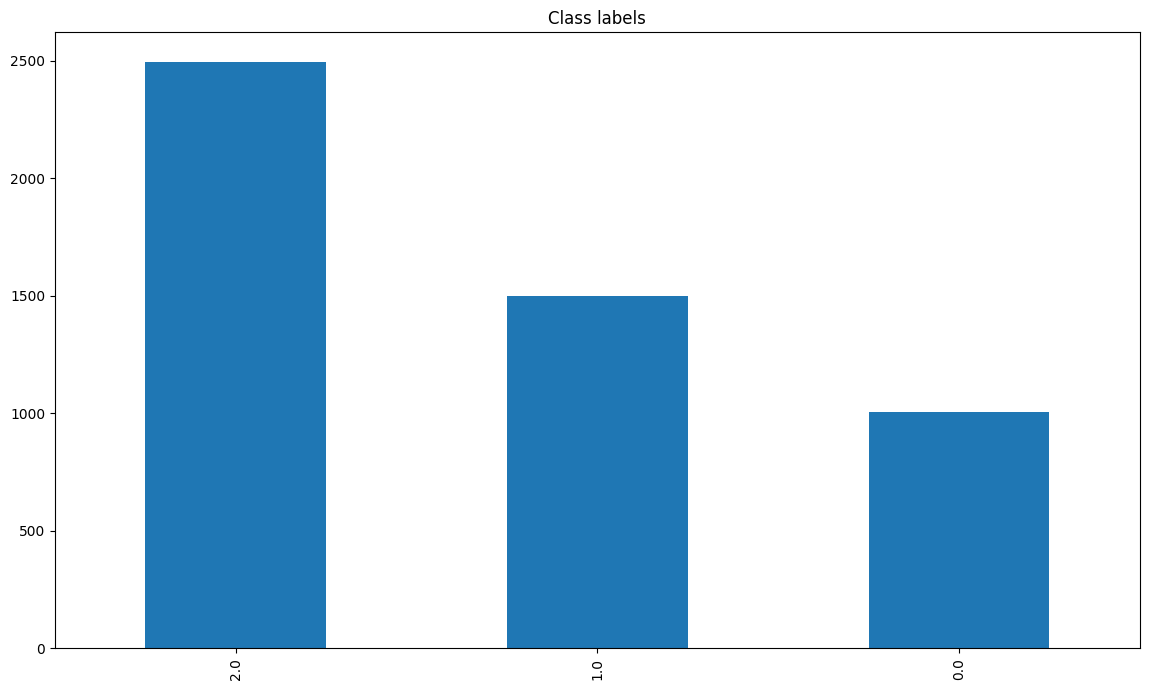

In [ ]:
train_df = train_df.sort_values(by=['class'])
Class_counts = train_df['class'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Class labels")
train_df['class'].value_counts()

#Sampling


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


# Normally our we are given train/test data separately
# hewever for this prac we will take 25% of the iris data can pretend that it's test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df[columns_to_leave], train_df['class'].values,
                                                    test_size=0.25, # use a teste sieve of 25%
                                                    random_state=42) # this random state ensures that we get the same subset each time we call this cell
print(y_test)
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_train_resampled.shape, y_train_resampled.shape



[1. 2. 2. ... 1. 2. 2.]


((5616, 41), (5616,))

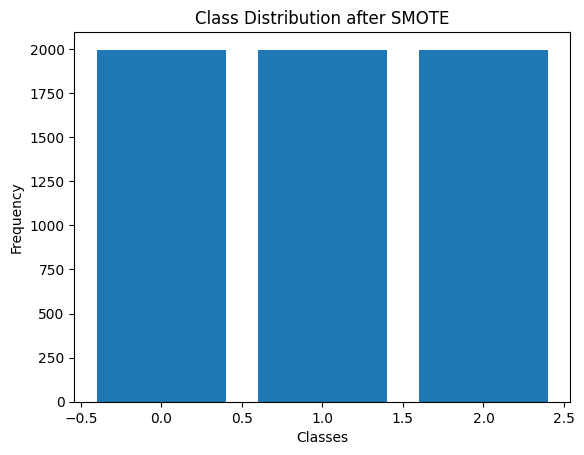

In [ ]:
from collections import Counter

class_counts = Counter(y_train_resampled)

# Plot the class distribution
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Class Distribution after SMOTE')
plt.show()

In [ ]:
# # Normally our we are given train/test data separately
# # hewever for this prac we will take 25% of the iris data can pretend that it's test data
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled,
#                                                     test_size=0.25, # use a teste sieve of 25%
#                                                     random_state=4) # this random state ensures that we get the same subset each time we call this cell

In [ ]:
X_train_resampled.shape,y_train_resampled.shape

((5616, 41), (5616,))

In [ ]:
# This is random sampling
ss = ShuffleSplit(n_splits=10, test_size=25, random_state=42)
# This is non-random sampling, we just break the data in to 10 contiguous sub-sets
kf = KFold(n_splits=10)
# Ensuring the balance between classes in the model/validate sets
# means we should use stratified sampling
skf = StratifiedKFold(n_splits=10)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """
    Create a sample plot for indices of a cross-validation object.
    Adapted from https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#define-a-function-to-visualize-cross-validation-behavior

    Parameters
    ----------
    cv: cross validation method

    X : training data

    y : data labels

    group : group labels

    ax : matplolib axes object

    n_splits : number of splits

    lw : line width for plotting
    """

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    ax.scatter(range(len(X)), [ii + 2.5] * len(X),
               c=group, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class', 'group']
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+2.2, -.2])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

<ipython-input-128-8d7d688496b9>:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(range(len(X)), [ii + 2.5] * len(X),
<ipython-input-128-8d7d688496b9>:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(range(len(X)), [ii + 2.5] * len(X),


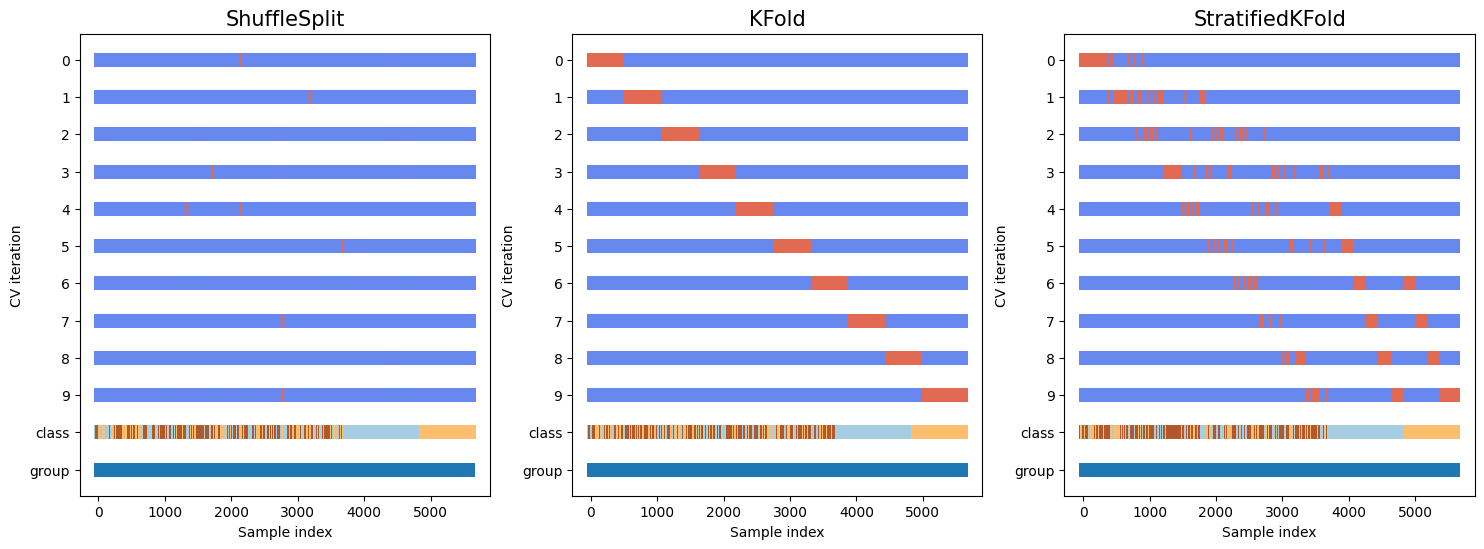

In [ ]:
# Set up a figure with three subplots
fig, ax = plt.subplots(1,3, figsize=(18,6))
# visualise the ShulffleSplit algorithm
plot_cv_indices(ss,
                X_train_resampled, y_train_resampled,
                group=None,
                ax=ax[0],
                n_splits=10)
# visualise the KFolds algorithm
plot_cv_indices(kf,
                X_train_resampled, y_train_resampled,
                group=None,
                ax=ax[1],
                n_splits=10)
# visualise the StratifiedKFolds algorithm
plot_cv_indices(skf,
                X_train_resampled, y_train_resampled,
                group=None,
                ax=ax[2],
                n_splits=10)
plt.show()

##KNN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Create a dictionary of all the parameters we'll be iterating over
parameters = {'weights': ['uniform','distance'], # this should be the different weighting schemes
              'n_neighbors':[1,3,7,11,17,21]} # this should be a list of the nearest neigbhours
# make a classifier object
knn = KNeighborsClassifier()
# create a GridSearchCV object to do the training with cross validation
gscv = GridSearchCV(estimator=knn,
                    param_grid=parameters,
                    cv=skf,  # the cross validation folding pattern
                    scoring='accuracy')
# now train our model
best_knn = gscv.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters and best cross-validation score
best_params = best_knn.best_params_
best_score = best_knn.best_score_
print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Evaluate the model on the test set using the best hyperparameters and PCA
best_model = best_knn.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)

Best Hyperparameters: {'n_neighbors': 1, 'weights': 'uniform'}
Best Cross-Validation Score: 0.9108122252459703
Test Set Accuracy: 0.7328


In [ ]:
knn = KNeighborsClassifier(weights = best_knn.best_params_['weights'],
                            n_neighbors = best_knn.best_params_['n_neighbors'])
knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score( y_test, y_pred)
print(f"KNN accuracy is {accuracy:5.3f}")

KNN accuracy is 0.716


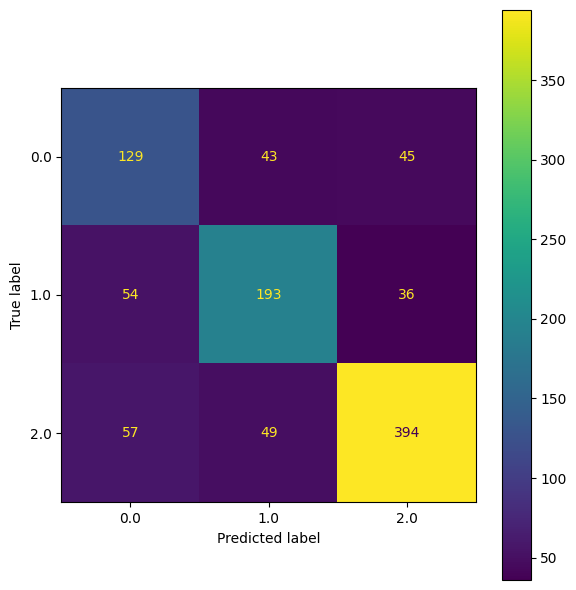

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6, 6))

ConfusionMatrixDisplay.from_estimator(knn,
                                      X_test, y_test,
                                      ax=ax)
plt.tight_layout()
plt.show()

# Naive Bayes Classification

In [ ]:
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have X_train_resampled, X_test, y_train_resampled, and y_test defined

# Adjust the number of components as needed
pca = PCA(n_components=0.75)

# Transform the original data to the first two principal components
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test)

# Create a Gaussian Naive Bayes classifier
nb = GaussianNB()

# Define the parameters for GridSearchCV
parameters = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1],
    'priors': [[0.33, 0.33, 0.34], [0.2, 0.6, 0.2], [0.4, 0.1, 0.5]]
 # Define different prior probabilities
}

# Create a GridSearchCV object
gsv = GridSearchCV(estimator=nb, param_grid=parameters, cv=skf, scoring='accuracy')

# Fit the GridSearchCV object to the training data with PCA
best_nb = gsv.fit(X_train_pca, y_train_resampled)

# Get the best hyperparameters and best cross-validation score
best_params = best_nb.best_params_
best_score = best_nb.best_score_
print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Evaluate the model on the test set using the best hyperparameters and PCA
best_model = best_nb.best_estimator_
y_pred = best_model.predict(X_test_pca)

# Evaluate the classifier's performance using various metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Test Set Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)



Best Hyperparameters: {'priors': [0.33, 0.33, 0.34], 'var_smoothing': 1e-05}
Best Cross-Validation Score: 0.7254369104484238
Test Set Accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

         0.0       0.48      0.65      0.55       267
         1.0       0.70      0.68      0.69       359
         2.0       0.86      0.73      0.79       624

    accuracy                           0.70      1250
   macro avg       0.68      0.69      0.68      1250
weighted avg       0.73      0.70      0.71      1250



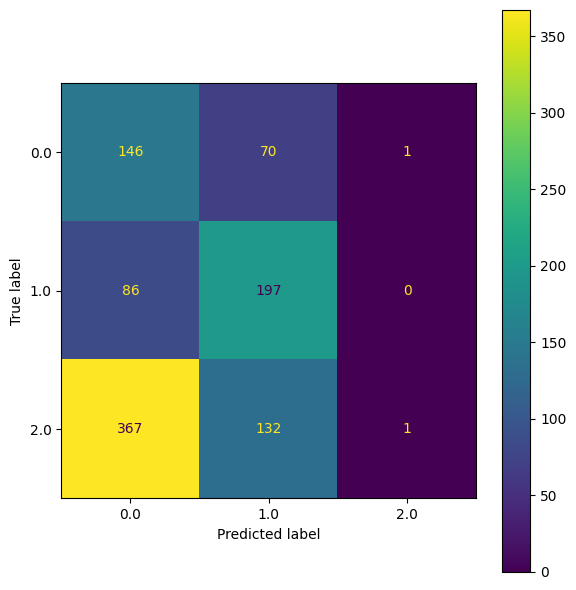

In [ ]:
nb.fit(X_train_resampled, y_train_resampled)
fig, ax = plt.subplots(1,1, figsize=(6, 6))

ConfusionMatrixDisplay.from_estimator(nb,
                                      X_test, y_test,
                                      ax=ax)
plt.tight_layout()
plt.show()

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Decision Tree accuracy is {accuracy:5.3f}")
print("Classification Report:\n", classification_rep)

Decision Tree accuracy is 0.734
Classification Report:
               precision    recall  f1-score   support

         0.0       0.58      0.66      0.62       267
         1.0       0.70      0.70      0.70       359
         2.0       0.83      0.78      0.81       624

    accuracy                           0.73      1250
   macro avg       0.70      0.72      0.71      1250
weighted avg       0.74      0.73      0.74      1250



In [ ]:
from sklearn import tree

In [ ]:
# Create a dictionary of all the parameters we'll be iterating over
parameters = {'criterion': ('gini','entropy'),  # this should be the different splitting criteria
              'min_samples_split':[3,5,15,20], 'max_depth' :[3]} # this should be the different values for min_samples_split
dtc = tree.DecisionTreeClassifier()
gscv = GridSearchCV(estimator=dtc,
                    param_grid=parameters,
                    cv=skf,
                    scoring='accuracy')
best_dtc = gscv.fit(X_train_resampled, y_train_resampled)

best_params = best_dtc.best_params_
best_score = best_dtc.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Evaluate the model on the test set using the best hyperparameters
best_model = best_dtc.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 3}
Best Cross-Validation Score: 0.6113857264195548
Test Set Accuracy: 0.64


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold

# Assuming you have X_train_resampled, X_test, y_train_resampled, and y_test defined

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the parameters for GridSearchCV
parameters = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [3, 5, 15, 20],
    'max_depth': [3, 5]
}

# Define the cross-validation strategy (e.g., Stratified K-Fold)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a GridSearchCV object
gscv = GridSearchCV(estimator=dt_classifier, param_grid=parameters, cv=skf, scoring='accuracy')

# Fit the GridSearchCV object to the training data
best_dtc = gscv.fit(X_train_resampled, y_train_resampled)

best_params = best_dtc.best_params_
best_score = best_dtc.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Evaluate the model on the test set using the best hyperparameters
best_model = best_dtc.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Decision Tree accuracy is {accuracy:5.3f}")
print("Classification Report:\n", classification_rep)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 3}
Best Cross-Validation Score: 0.7249527547304544
Decision Tree accuracy is 0.679
Classification Report:
               precision    recall  f1-score   support

         0.0       0.47      0.74      0.57       217
         1.0       0.67      0.67      0.67       283
         2.0       0.89      0.65      0.75       500

    accuracy                           0.68      1000
   macro avg       0.67      0.69      0.67      1000
weighted avg       0.73      0.68      0.69      1000



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold

# Assuming you have X_train_resampled, X_test, y_train_resampled, and y_test defined

# Adjust the number of components as needed for PCA
pca = PCA(n_components=3)

# Transform the original data to the first two principal components
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test)

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the parameters for GridSearchCV
parameters = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [3, 5, 15, 20],
    'max_depth': [3, 5]
}


# Create a GridSearchCV object
gscv = GridSearchCV(estimator=dt_classifier, param_grid=parameters, cv=skf, scoring='accuracy')

# Fit the GridSearchCV object to the training data with PCA
best_dtc = gscv.fit(X_train_pca, y_train_resampled)

best_params = best_dtc.best_params_
best_score = best_dtc.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Evaluate the model on the test set using the best hyperparameters and PCA
best_model = best_dtc.best_estimator_
y_pred = best_model.predict(X_test_pca)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Decision Tree accuracy is {accuracy:5.3f}")
print("Classification Report:\n", classification_rep)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 3}
Best Cross-Validation Score: 0.6458487956813265
Decision Tree accuracy is 0.662
Classification Report:
               precision    recall  f1-score   support

         0.0       0.46      0.27      0.34       267
         1.0       0.56      0.83      0.67       359
         2.0       0.82      0.74      0.77       624

    accuracy                           0.66      1250
   macro avg       0.61      0.61      0.59      1250
weighted avg       0.67      0.66      0.65      1250



In [ ]:
dtc = tree.DecisionTreeClassifier(criterion=best_dtc.best_params_['criterion'],
                                  min_samples_split=best_dtc.best_params_['min_samples_split'],max_depth=best_dtc.best_params_['max_depth'])
dtc.fit(X_train_resampled, y_train_resampled)

NameError: ignored

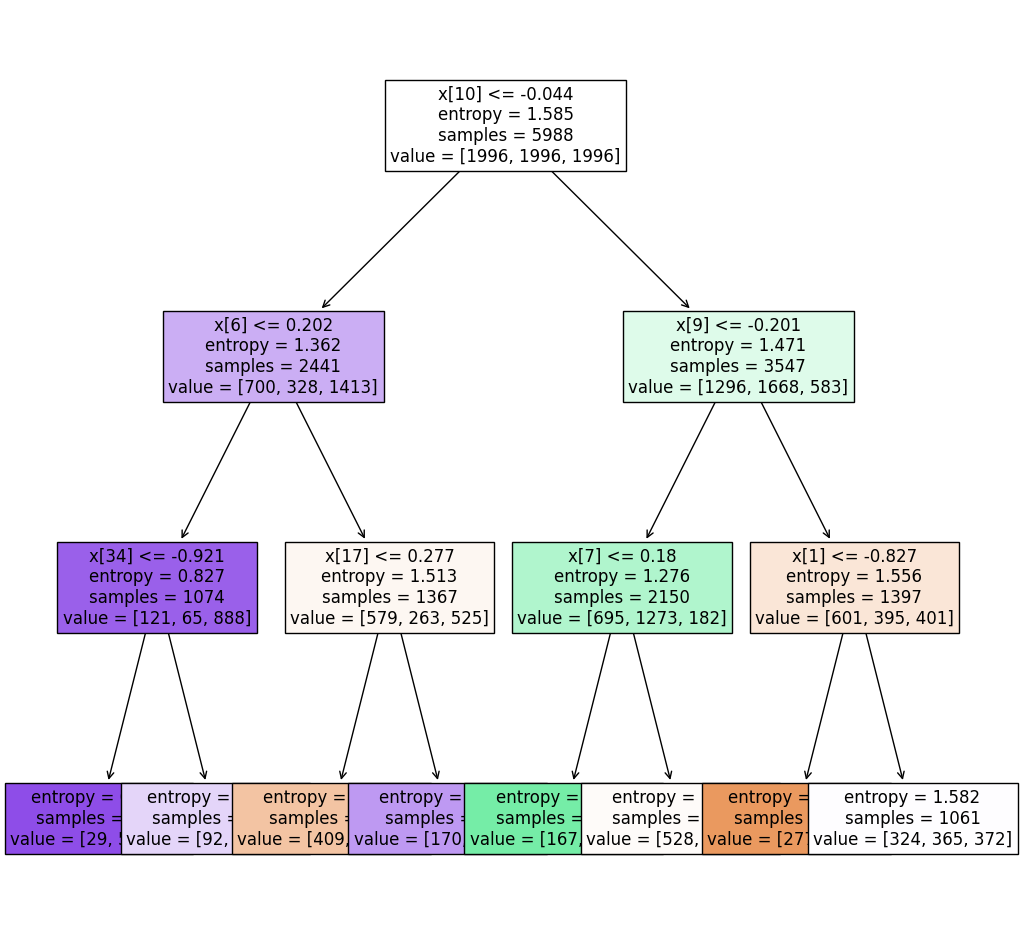

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
tree.plot_tree(dtc,
               filled=True, # color the nodes based on class/purity
               ax=ax, fontsize=12)
plt.show()

NameError: ignored

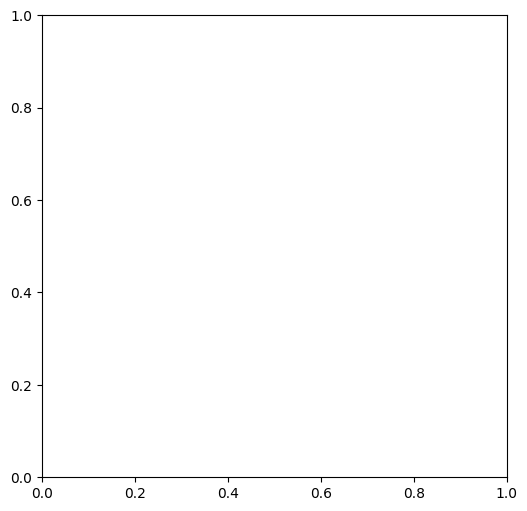

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6, 6))

ConfusionMatrixDisplay.from_estimator(dtc,
                                      X_test, y_test,
                                      ax=ax)
plt.tight_layout()
plt.show()

# Random Forest Classification


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameters for GridSearchCV
rf_parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a GridSearchCV object for Random Forest
rf_gsv = GridSearchCV(estimator=rf_classifier, param_grid=rf_parameters, cv=skf, scoring='accuracy')

# Fit the GridSearchCV object to the training data
best_rf = rf_gsv.fit(X_train_resampled, y_train_resampled)

# Get the best Random Forest model and its parameters
best_model = best_rf.best_estimator_
best_params = best_rf.best_params_
best_score = best_rf.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Evaluate the model on the test set using the best hyperparameters
best_model = best_rf.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)



In [ ]:
# Choose the top two models based on accuracy
top_models = {}
top_models['KNN'] = best_knn.best_score_
top_models['Decision Tree'] = best_dtc.best_score_
top_models['Naive Bayes'] = best_nb.best_score_

# Sort the models by accuracy and select the top two
top_models = dict(sorted(top_models.items(), key=lambda item: item[1], reverse=True)[:2])

print("Top Two Models:", top_models)


Top Two Models: {'KNN': 0.9108122252459703, 'Naive Bayes': 0.7254369104484238}


In [ ]:
# Assuming X_200_test is your 200 test samples
# Assuming top_models contains the top two models

predictions = {}

for model_name, model in top_models.items():
    if model_name == 'KNN':
        predictions[model_name] = best_knn.predict(X_test)
    elif model_name == 'Decision Tree':
        predictions[model_name] = best_dtc.predict(X_test)
    elif model_name == 'Naive Bayes':
        predictions[model_name] = best_nb.predict(X_test)

# You can access the predictions for each model in the 'predictions' dictionary


In [ ]:
# Assuming you have the validation data (X_val, y_val) and top_models contains the top two models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

validation_metrics = {}

for model_name, model in top_models.items():
    if model_name == 'Naive Bayes':
        y_val_pred = best_knn.predict(X_test)
    elif model_name == 'Decision Tree':
        y_val_pred = best_dtc.predict(X_test)
    elif model_name == 'Naive Bayes':
        y_val_pred = best_nb.predict(X_test)

    # Calculate relevant performance metrics on the validation data
    accuracy = accuracy_score(y_test, y_val_pred)
    precision = precision_score(y_test, y_val_pred)
    recall = recall_score(y_test, y_val_pred)
    f1 = f1_score(y_test, y_val_pred)

    validation_metrics[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
    }

# Print validation performance metrics for each selected model
for model_name, metrics in validation_metrics.items():
    print(f"{model_name} Validation Metrics:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.2f}")
    print("\n")


NameError: ignored

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Create a dictionary to store the top two models and their scores
top_models = {}
top_models['KNN'] = best_knn.best_score_
top_models['Decision Tree'] = best_dtc.best_score_
top_models['Naive Bayes'] = best_nb.best_score_

# Sort the models by accuracy and select the top two
top_models = dict(sorted(top_models.items(), key=lambda item: item[1], reverse=True)[:2])

# Initialize a dictionary to store validation metrics for each selected model
validation_metrics = {}

# Loop through the selected models
for model_name, model_score in top_models.items():
    if model_name == 'KNN':
        best_model = best_knn
    elif model_name == 'Decision Tree':
        best_model = best_dtc
    elif model_name == 'Naive Bayes':
        best_model = best_nb

    # Predict on the validation data
    y_val_pred = best_model.predict(X_test)

    # Calculate relevant performance metrics on the validation data
    accuracy = accuracy_score(y_test, y_val_pred)
    precision = precision_score(y_test, y_val_pred)
    recall = recall_score(y_test, y_val_pred)
    f1 = f1_score(y_test, y_val_pred)

    # Store the metrics in the validation_metrics dictionary
    validation_metrics[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
    }

# Print validation performance metrics for each selected model
for model_name, metrics in validation_metrics.items():
    print(f"{model_name} Validation Metrics:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.2f}")
    print("\n")


ValueError: ignored

In [ ]:
test_df.shape

(500, 42)

In [ ]:
# test_df = test_df.drop(columns=['class'],inplace =True)
test_df.columns

Index(['Att00', 'Att01', 'Att02', 'Att03', 'Att04', 'Att05', 'Att06', 'Att07',
       'Att08', 'Att09', 'Att10', 'Att12', 'Att13', 'Att14', 'Att15', 'Att17',
       'Att18', 'Att19', 'Att20', 'Att21', 'Att22', 'Att23', 'Att24', 'Att26',
       'Att27', 'Att28', 'Att29', 'Att11_LCAS', 'Att11_NAAU', 'Att11_NBAE',
       'Att11_QQNT', 'Att11_USGL', 'Att16_ITRV', 'Att16_MFLQ', 'Att16_PWEH',
       'Att16_QKNH', 'Att16_VVQP', 'Att16_XCYU', 'Att16_YCQC', 'Att16_YNCP',
       'Att16_ZFBS', 'Att25_CDJW'],
      dtype='object')

In [ ]:
# Assuming you have a trained model 'best_model' and a test DataFrame 'test_df'
# 'train_columns' represents the columns used during training

# Get the columns in the test DataFrame
test_columns = train_df.columns

# Check for missing columns in the test data
missing_columns = [col for col in test_df if col not in test_columns]

# Print the missing columns
if missing_columns:
    print("Missing columns in test data:", missing_columns)
else:
    print("No missing columns in test data")

# Optionally, you can handle missing columns or drop them from the test DataFrame if needed.


Missing columns in test data: ['Att15', 'Att24', 'Att16_MFLQ']


In [ ]:
X_test_df = test_df.drop(columns=['Att15','Att24','Att16_MFLQ'], inplace =True)

In [ ]:
test_df.columns

Index(['Att00', 'Att01', 'Att02', 'Att03', 'Att04', 'Att05', 'Att06', 'Att07',
       'Att08', 'Att09', 'Att10', 'Att12', 'Att13', 'Att14', 'Att17', 'Att18',
       'Att19', 'Att20', 'Att21', 'Att22', 'Att23', 'Att26', 'Att27', 'Att28',
       'Att29', 'Att11_LCAS', 'Att11_NAAU', 'Att11_NBAE', 'Att11_QQNT',
       'Att11_USGL', 'Att16_ITRV', 'Att16_PWEH', 'Att16_QKNH', 'Att16_VVQP',
       'Att16_XCYU', 'Att16_YCQC', 'Att16_YNCP', 'Att16_ZFBS', 'Att25_CDJW'],
      dtype='object')

In [ ]:
train_df.columns

Index(['Att00', 'Att01', 'Att02', 'Att03', 'Att04', 'Att05', 'Att06', 'Att07',
       'Att08', 'Att09', 'Att10', 'Att12', 'Att13', 'Att14', 'Att17', 'Att18',
       'Att19', 'Att20', 'Att21', 'Att22', 'Att23', 'Att26', 'Att27', 'Att28',
       'Att29', 'class', 'Att11_KRNB', 'Att11_LCAS', 'Att11_NAAU',
       'Att11_NBAE', 'Att11_QQNT', 'Att11_USGL', 'Att16_ITRV', 'Att16_PWEH',
       'Att16_QKNH', 'Att16_VVQP', 'Att16_XCYU', 'Att16_YCQC', 'Att16_YNCP',
       'Att16_ZFBS', 'Att25_CDJW', 'Att25_VVFP'],
      dtype='object')

In [ ]:
# Assuming you have a trained model 'best_model' and test DataFrame 'test_df'
# 'train_columns' represents the columns used during training

# Verify that train_df and test_df are not None and have data
if train_df is not None and test_df is not None:

    # Get the columns in the test DataFrame
    test_columns = test_df.columns

    # Check for missing columns in the test data
    missing_columns = [col for col in train_df if col not in test_columns]

    # Print the missing columns
    if missing_columns:
        print("Missing columns in test data:", missing_columns)
    else:
        print("No missing columns in test data")

    # Optionally, you can handle missing columns or drop them from the test DataFrame if needed.

else:
    print("train_df and/or test_df is None or empty. Please check your data.")


Missing columns in test data: ['class', 'Att11_KRNB', 'Att25_VVFP']


In [ ]:
# Assuming you have a trained Random Forest classifier stored in 'best_rf_model' and the test DataFrame 'test_df'

# Extract features from the test DataFrame
    # Replace 'target_column' with the actual name of the target column

# Predict the class labels for the test data
y_test_pre = best_dtc.predict(X_test_df)

# Now, 'y_test_pred' contains the predicted class labels for the test data

# Print the predicted labels (optional)
print("Predicted Class Labels for Test Data:", y_test_pre)


ValueError: ignored